In [58]:
!pip3 install seaborn

     |████████████████████████████████| 292 kB 593 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [35]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [84]:
datasets = pd.read_csv('Datasets/Exercise-CarData.csv',na_values = ["??","????"]) 
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
       Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
0              0  13500  23.0  46986.0   Diesel   90.0       1.0          0   
1              1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
2              2  13950  24.0  41711.0   Diesel   90.0       NaN          0   
3              3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4              4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
...          ...    ...   ...      ...      ...    ...       ...        ...   
1431        1431   7500   NaN  20544.0   Petrol   86.0       1.0          0   
1432        1432  10845  72.0      NaN   Petrol   86.0       0.0          0   
1433        1433   8500   NaN  17016.0   Petrol   86.0       0.0          0   
1434        1434   7250  70.0      NaN      NaN   86.0       1.0          0   
1435        1435   6950  76.0      1.0   Petrol  110.0       0.0          0   

        CC  Doors  Weight  
0     2000  th

In [85]:
# All rows, all columns except last 
X = datasets.iloc[:, :-1].values 
  
# Only last column  
Y = datasets.iloc[:, -1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y)



Input : 
 [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output: 
 [1165 1165 1165 ... 1015 1015 1114]


In [86]:
map_doors_count= {"one":1,"two":2,"three":3,"four":4,"five":5}
#datasets['Doors']= pd.to_numeric(datasets['Doors'])
datasets['Doors'] =datasets["Doors"].replace(map_doors_count)

In [87]:
datasets = pd.get_dummies(datasets,columns=['FuelType'])
print(datasets)

      Unnamed: 0  Price   Age       KM     HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986.0   90.0       1.0          0  2000   
1              1  13750  23.0  72937.0   90.0       1.0          0  2000   
2              2  13950  24.0  41711.0   90.0       NaN          0  2000   
3              3  14950  26.0  48000.0   90.0       0.0          0  2000   
4              4  13750  30.0  38500.0   90.0       0.0          0  2000   
...          ...    ...   ...      ...    ...       ...        ...   ...   
1431        1431   7500   NaN  20544.0   86.0       1.0          0  1300   
1432        1432  10845  72.0      NaN   86.0       0.0          0  1300   
1433        1433   8500   NaN  17016.0   86.0       0.0          0  1300   
1434        1434   7250  70.0      NaN   86.0       1.0          0  1300   
1435        1435   6950  76.0      1.0  110.0       0.0          0  1600   

     Doors  Weight  FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0        3    1165

In [88]:
# Drop the row having all null values
datasets.dropna(how='all',inplace=True)
print("\nNew Data :\n",datasets)


New Data :
       Unnamed: 0  Price   Age       KM     HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986.0   90.0       1.0          0  2000   
1              1  13750  23.0  72937.0   90.0       1.0          0  2000   
2              2  13950  24.0  41711.0   90.0       NaN          0  2000   
3              3  14950  26.0  48000.0   90.0       0.0          0  2000   
4              4  13750  30.0  38500.0   90.0       0.0          0  2000   
...          ...    ...   ...      ...    ...       ...        ...   ...   
1431        1431   7500   NaN  20544.0   86.0       1.0          0  1300   
1432        1432  10845  72.0      NaN   86.0       0.0          0  1300   
1433        1433   8500   NaN  17016.0   86.0       0.0          0  1300   
1434        1434   7250  70.0      NaN   86.0       1.0          0  1300   
1435        1435   6950  76.0      1.0  110.0       0.0          0  1600   

     Doors  Weight  FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0    

In [126]:
# All rows, all columns except last 
new_X = datasets.iloc[:, :-3].values
  
# Only last column  
new_Y = datasets.iloc[:, -3:].values


# Using Imputer function to replace NaN values with mean of that parameter value 
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")

# Fitting the data, function learns the stats 
imputer = imputer.fit(new_X[:,:]) 
  
# fit_transform() will execute those stats on the input ie. X[:, :] 
new_X[:, :] = imputer.transform(new_X[:, :]) 
  
# filling the missing value with mean 
print("\n\nNew Input: \n\n", new_X)
print("\n\nOutput: \n\n",new_Y)




New Input : 

 [[0.0 13500.0 23.0 ... 2000.0 3.0 1165.0]
 [1.0 13750.0 23.0 ... 2000.0 3.0 1165.0]
 [2.0 13950.0 24.0 ... 2000.0 3.0 1165.0]
 ...
 [1433.0 8500.0 55.67215568862275 ... 1300.0 3.0 1015.0]
 [1434.0 7250.0 70.0 ... 1300.0 3.0 1015.0]
 [1435.0 6950.0 76.0 ... 1600.0 5.0 1114.0]]


Output: 

 [[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 0]
 [0 0 1]]


In [127]:
data= pd.DataFrame(new_X, columns=datasets.iloc[:,:-3].columns, dtype=int)
print(data)
data.info()

      Unnamed: 0  Price  Age     KM   HP  MetColor  Automatic    CC  Doors  \
0              0  13500   23  46986   90         1          0  2000      3   
1              1  13750   23  72937   90         1          0  2000      3   
2              2  13950   24  41711   90         0          0  2000      3   
3              3  14950   26  48000   90         0          0  2000      3   
4              4  13750   30  38500   90         0          0  2000      3   
...          ...    ...  ...    ...  ...       ...        ...   ...    ...   
1431        1431   7500   55  20544   86         1          0  1300      3   
1432        1432  10845   72  68647   86         0          0  1300      3   
1433        1433   8500   55  17016   86         0          0  1300      3   
1434        1434   7250   70  68647   86         1          0  1300      3   
1435        1435   6950   76      1  110         0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3  

In [128]:
corr= data.corr()
corr.head()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Unnamed: 0,1.000000,-0.738289,0.872340,0.276041,-0.108124,-0.073913,0.066299,-0.184490,-0.130268,-0.414577
Price,-0.738289,1.000000,-0.844883,-0.565016,0.308321,0.106353,0.033081,0.165067,0.185326,0.581198
Age,0.872340,-0.844883,1.000000,0.495402,-0.152661,-0.091196,0.030653,-0.116000,-0.151549,-0.441797
KM,0.276041,-0.565016,0.495402,1.000000,-0.333029,-0.076956,-0.080743,0.296281,-0.036021,-0.025758
HP,-0.108124,0.308321,-0.152661,-0.333029,1.000000,0.057959,0.013786,0.053284,0.096943,0.086044


<AxesSubplot:>

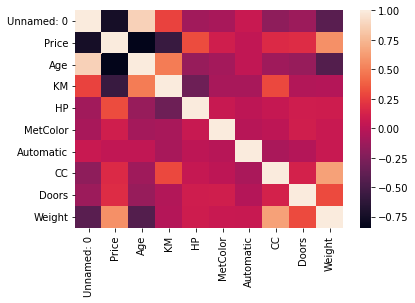

In [129]:
sns.heatmap(corr)

In [130]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False

In [131]:
selected_columns = data.columns[columns]
selected_columns.shape

(8,)

In [132]:
print(data[selected_columns])

      Unnamed: 0  Price     KM   HP  MetColor  Automatic    CC  Doors
0              0  13500  46986   90         1          0  2000      3
1              1  13750  72937   90         1          0  2000      3
2              2  13950  41711   90         0          0  2000      3
3              3  14950  48000   90         0          0  2000      3
4              4  13750  38500   90         0          0  2000      3
...          ...    ...    ...  ...       ...        ...   ...    ...
1431        1431   7500  20544   86         1          0  1300      3
1432        1432  10845  68647   86         0          0  1300      3
1433        1433   8500  17016   86         0          0  1300      3
1434        1434   7250  68647   86         1          0  1300      3
1435        1435   6950      1  110         0          0  1600      5

[1436 rows x 8 columns]
